In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
# sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../data/processed_sensor_community.csv", index_col=0)
df.timestamp = pd.to_datetime(df.timestamp)
df

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,0,2020-01-01,50.042000,8.436000,2020-01-01 00:00:00,212.110833,140.574167,24.278724,16.827501,NaN,2.700000,96.000000,NaN,NaN,NaN
1,0,2020-01-01,50.046000,8.852000,2020-01-01 00:00:00,627.256000,311.089200,62.521844,41.972714,NaN,-0.536000,98.892000,NaN,0.111355,0.351094
2,0,2020-01-01,50.055659,8.692377,2020-01-01 00:00:00,305.763333,203.632500,114.922437,81.541566,NaN,-0.108333,99.900000,NaN,0.210417,0.000000
3,0,2020-01-01,50.056000,8.506000,2020-01-01 00:00:00,177.833333,86.575000,32.063441,18.312198,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2020-01-01,50.058000,8.688000,2020-01-01 00:00:00,96.024167,51.565833,60.892413,31.903331,102132.965833,6.958333,53.087500,10.008531,0.067545,0.416280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872414,23,2022-02-28,53.094000,8.800000,2022-02-28 23:00:00,30.930000,17.439167,2.525716,1.082826,103067.097083,2.551250,100.000000,5.860273,0.084971,0.000000
1872415,23,2022-02-28,53.096000,8.802000,2022-02-28 23:00:00,49.369455,21.796909,2.883743,0.877165,NaN,2.487273,99.900000,NaN,0.086184,0.000000
1872416,23,2022-02-28,53.131823,8.732302,2022-02-28 23:00:00,29.000000,14.251818,2.167469,0.638940,103027.205909,1.310000,100.000000,6.738443,0.102446,0.000000
1872417,23,2022-02-28,53.132000,8.708000,2022-02-28 23:00:00,5.765263,5.185789,0.447950,0.387317,NaN,22.594737,31.521053,NaN,0.077986,0.063060


In [3]:
data_cols = list(df.columns)[5:]
print(data_cols)

['PM10', 'PM2p5', 'PM10_std', 'PM2p5_std', 'pressure', 'temperature', 'humidity', 'pressure_std', 'temperature_std', 'humidity_std']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   hour             int64         
 1   date             object        
 2   lat              float64       
 3   lon              float64       
 4   timestamp        datetime64[ns]
 5   PM10             float64       
 6   PM2p5            float64       
 7   PM10_std         float64       
 8   PM2p5_std        float64       
 9   pressure         float64       
 10  temperature      float64       
 11  humidity         float64       
 12  pressure_std     float64       
 13  temperature_std  float64       
 14  humidity_std     float64       
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 228.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,1872419.0,11.566933,6.895259,0.000000,6.000000,12.000000,18.000000,2.300000e+01
lat,1872419.0,51.135044,1.402312,50.032000,50.118000,50.150000,53.064000,5.314000e+01
lon,1872419.0,8.700289,0.118713,8.436000,8.628000,8.702000,8.800000,8.910000e+00
PM10,1872408.0,28.059194,162.742950,0.000000,4.190952,8.142500,16.140421,1.999900e+03
PM2p5,1872405.0,14.979465,84.485208,0.000000,1.924167,4.074583,9.200833,9.999000e+02
PM10_std,1866479.0,3.976624,22.051697,0.000000,1.182572,1.847426,2.905975,1.383292e+03
PM2p5_std,1866475.0,1.683444,11.934308,0.000000,0.291361,0.510574,0.970512,6.793670e+02
pressure,366039.0,99734.563922,17078.993859,951.015385,99874.167813,100638.389655,101455.600000,6.437391e+06
temperature,1571687.0,12.238369,53.894040,-3276.600000,6.820833,12.229167,19.095000,1.959636e+02
humidity,1559298.0,79.774832,26.862098,0.000000,63.233333,95.505882,99.900000,2.094545e+03


In [6]:
print("missing values in each column")
for col in df.columns:
    print(f"{col}: {df[col].isna().sum()} ({round(df[col].isna().sum() / df.shape[0] * 100, 1)} %)")

missing values in each column
hour: 0 (0.0 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
timestamp: 0 (0.0 %)
PM10: 11 (0.0 %)
PM2p5: 14 (0.0 %)
PM10_std: 5940 (0.3 %)
PM2p5_std: 5944 (0.3 %)
pressure: 1506380 (80.5 %)
temperature: 300732 (16.1 %)
humidity: 313121 (16.7 %)
pressure_std: 1507361 (80.5 %)
temperature_std: 305330 (16.3 %)
humidity_std: 317713 (17.0 %)


In [11]:
print("value '0' in each column")
for col in df.columns:
    print(f"{col}: {df[df[col]==0][col].count()} ({round(df[df[col]==0][col].count() / df.shape[0] * 100, 1)} %)")

value '0' in each column
hour: 76495 (4.1 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
timestamp: 0 (0.0 %)
PM10: 2662 (0.1 %)
PM2p5: 3300 (0.2 %)
PM10_std: 15968 (0.9 %)
PM2p5_std: 22337 (1.2 %)
pressure: 0 (0.0 %)
temperature: 201 (0.0 %)
humidity: 303 (0.0 %)
pressure_std: 973 (0.1 %)
temperature_std: 16345 (0.9 %)
humidity_std: 746411 (39.9 %)


In [8]:
def count_nan_and_0s(df: pd.DataFrame, cols: list = None) -> pd.DataFrame:
    """Counts zeros and nans per column.

    Args:
        df (pd.DataFrame): Dataframe to search for zeros and nans.
        cols (list, optional): List of columns, if no columns are specified all will be used. Defaults to None.
        thresholds (dict, optional): Thresholds for further . Defaults to None.

    Returns:
        pd.DataFrame: Dataframe containing counts of zeros and nans.
    """
    # use all columns af none were defined
    if cols == None:
        cols=df.columns
    # make a new dataframe and put the defined column names in the first column
    df_nan_0 = pd.DataFrame()
    df_nan_0['data'] = cols
    # calculate missing values and zeros as absolute value and share 
    df_nan_0['missing_values'] = [df[col].isna().sum() for col in cols]
    df_nan_0['missing_values_share'] = [df[col].isna().sum() / df.shape[0] * 100 for col in cols]
    df_nan_0['0_values'] = [df[df[col]==0][col].count() for col in cols]
    df_nan_0['0_values_share'] = [df[df[col]==0][col].count() / df.shape[0] * 100 for col in cols]

    # transpose the dataframe and use the original column names as column names
    df_nan_0 = df_nan_0.set_index('data').T.reset_index()
    df_nan_0.columns = [name if i>0 else 'metric' for i, name in enumerate(df_nan_0.columns)]
    return df_nan_0

df_data_analysis = count_nan_and_0s(df, data_cols)
df_data_analysis


,metric,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,missing_values,11.000000,14.000000,5940.000000,5944.000000,1.506380e+06,300732.000000,313121.000000,1.507361e+06,305330.000000,317713.00000
1,missing_values_share,0.000587,0.000748,0.317237,0.317450,8.045101e+01,16.061149,16.722806,8.050340e+01,16.306713,16.96805
2,0_values,2662.000000,3300.000000,15968.000000,22337.000000,0.000000e+00,201.000000,303.000000,9.730000e+02,16345.000000,746411.00000
3,0_values_share,0.142169,0.176243,0.852801,1.192949,0.000000e+00,0.010735,0.016182,5.196486e-02,0.872935,39.86346


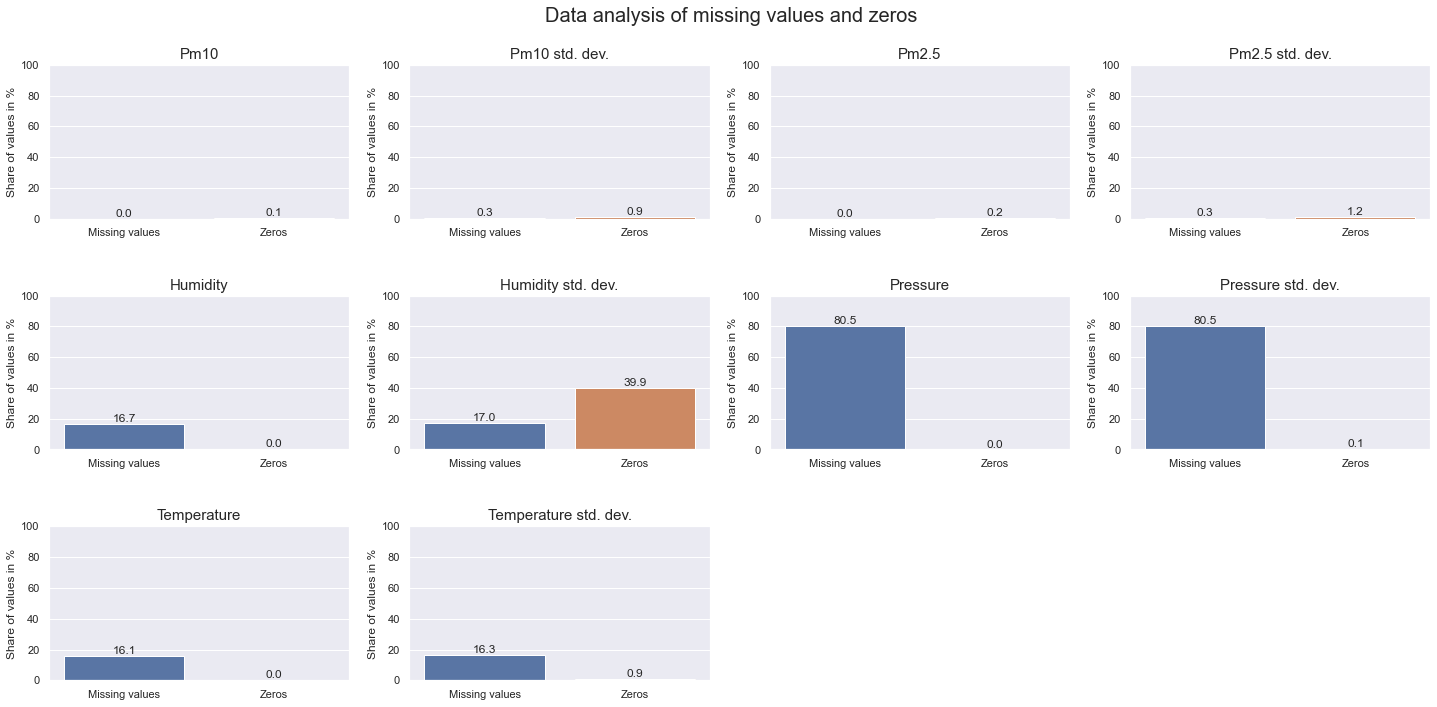

In [14]:
# define metrics and columns to plot
metrics = ["missing_values_share", "0_values_share"]
ys = sorted(list(df_data_analysis.columns))
ys.remove('metric')

# define size of subplot
columns = 4
rows = int(np.ceil((len(df_data_analysis.columns) - 1) / columns))

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,10)) # create subplots
plt.suptitle("Data analysis of missing values and zeros", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

for row in range(rows):
    for col in range(columns):
        if col + row * (rows + 1) < len(ys):
            # create a bar for each metric defined above for a column of ys list
            sns.barplot(data=df_data_analysis[df_data_analysis['metric'].isin(metrics)], x='metric', y=ys[col + row * (rows + 1)], ax=ax[row][col])
            # set ylim to [0, 100] as we are plotting percentages
            ax[row][col].set_ylim([0, 100])
            # put the percentage above each plotted bar
            ax[row][col].bar_label(ax[row][col].containers[0], fmt='%.1f')
            # set the x, y and x-tick labels
            ax[row][col].set_xlabel("")
            ax[row][col].set_ylabel("Share of values in %")
            ax[row][col].set_xticklabels(labels=["Missing values", "Zeros"])
            # use the column name with slight changes as subplot name
            title = f"{ys[col + row * (rows + 1)]}".replace('_', ' ').replace('std', 'std. dev.').replace('2p5', '2.5').capitalize()
            ax[row][col].set_title(title, fontsize = 15);
        else:
            # delete not needed subplots
            fig.delaxes(ax[row][col])


''

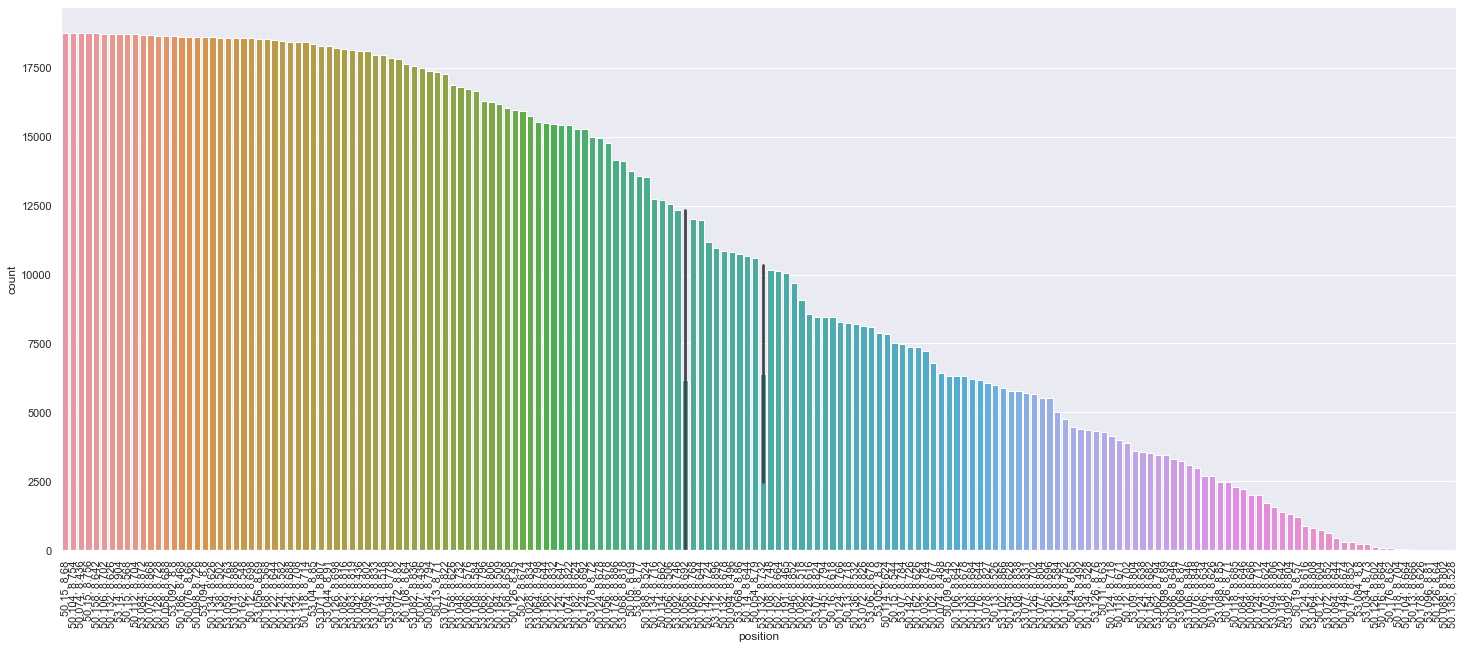

In [12]:
plt.figure(figsize=(25, 10))
sensor_count = df[['lat', 'lon', 'hour']].\
    groupby(['lat', 'lon']).\
        count().\
            reset_index().\
                sort_values('hour', ascending=False).\
                    rename(columns={'hour': 'count'})
sensor_count['position'] = round(sensor_count['lat'], 3).astype(str) + ', ' + round(sensor_count['lon'], 3).astype(str)
sns.barplot(data=sensor_count, x='position', y='count')
plt.xticks(rotation=90)
;

In [16]:
sensor_count.tail(20)

,lat,lon,count,position
137,53.064000,8.808000,803,"53.064, 8.808"
50,50.120000,8.604000,740,"50.12, 8.604"
147,53.072000,8.852000,620,"53.072, 8.852"
18,50.084000,8.644000,432,"50.084, 8.644"
94,50.148000,8.674000,314,"50.148, 8.674"
111,50.170000,8.852000,310,"50.17, 8.852"
161,53.084000,8.800000,229,"53.084, 8.8"
126,53.034000,8.730000,225,"53.034, 8.73"
67,50.126000,8.602000,130,"50.126, 8.602"
44,50.116000,8.664000,72,"50.116, 8.664"
